### Breast Cancer Wisconsin (Diagnostic) Data Set

We conducted an analysis using the to predict whether the cancer is benign or malignant.

Data set contains details about :
i) ID number
ii) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

We Performed two classification Algorithm to check the weather Brest cancer is M = malignant, B = benign:
1. K Nearest Neighbour(KNN)
2. Naive Bayes

In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\HP PC\\Documents\\Breast cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df=df.drop(columns=['id','Unnamed: 32'])
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [3]:
diagnosis = {'M': 1,'B': 0}

df.diagnosis = [diagnosis[item] for item in df.diagnosis]
print(df)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1       17.990         10.38          122.80     1001.0   
1            1       20.570         17.77          132.90     1326.0   
2            1       19.690         21.25          130.00     1203.0   
3            1       11.420         20.38           77.58      386.1   
4            1       20.290         14.34          135.10     1297.0   
5            1       12.450         15.70           82.57      477.1   
6            1       18.250         19.98          119.60     1040.0   
7            1       13.710         20.83           90.20      577.9   
8            1       13.000         21.82           87.50      519.8   
9            1       12.460         24.04           83.97      475.9   
10           1       16.020         23.24          102.70      797.8   
11           1       15.780         17.89          103.60      781.0   
12           1       19.170         24.80          132.40     11

In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1,0.73,0.42,0.74,0.71,0.36,0.6,0.7,0.78,0.33,-0.013,0.57,-0.0083,0.56,0.55,-0.067,0.29,0.25,0.41,-0.0065,0.078,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1,0.32,1,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.097,0.67,0.74,-0.22,0.21,0.19,0.38,-0.1,-0.043,0.97,0.3,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.0071
texture_mean,0.42,0.32,1,0.33,0.32,-0.023,0.24,0.3,0.29,0.071,-0.076,0.28,0.39,0.28,0.26,0.0066,0.19,0.14,0.16,0.0091,0.054,0.35,0.91,0.36,0.34,0.078,0.28,0.3,0.3,0.11,0.12
perimeter_mean,0.74,1,0.33,1,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.087,0.69,0.74,-0.2,0.25,0.23,0.41,-0.082,-0.0055,0.97,0.3,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.051
area_mean,0.71,0.99,0.32,0.99,1,0.18,0.5,0.69,0.82,0.15,-0.28,0.73,-0.066,0.73,0.8,-0.17,0.21,0.21,0.37,-0.072,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.0037
smoothness_mean,0.36,0.17,-0.023,0.21,0.18,1,0.66,0.52,0.55,0.56,0.58,0.3,0.068,0.3,0.25,0.33,0.32,0.25,0.38,0.2,0.28,0.21,0.036,0.24,0.21,0.81,0.47,0.43,0.5,0.39,0.5
compactness_mean,0.6,0.51,0.24,0.56,0.5,0.66,1,0.88,0.83,0.6,0.57,0.5,0.046,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.7,0.68,0.3,0.72,0.69,0.52,0.88,1,0.92,0.5,0.34,0.63,0.076,0.66,0.62,0.099,0.67,0.69,0.68,0.18,0.45,0.69,0.3,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1,0.46,0.17,0.7,0.021,0.71,0.69,0.028,0.49,0.44,0.62,0.095,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.071,0.18,0.15,0.56,0.6,0.5,0.46,1,0.48,0.3,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.091,0.22,0.18,0.43,0.47,0.43,0.43,0.7,0.44


In [64]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
knn=KNeighborsClassifier(n_neighbors=10,metric='minkowski')
knn.fit(X_scaled,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

#### Grid Cross validation on KNN

In [69]:

from sklearn.model_selection import GridSearchCV


knn_params = {'n_neighbors': range(1, 11), 'weights':['uniform', 'distance']}
X_scaled_train, X_scaled_holdout, y_train, y_holdout = train_test_split(X_scaled, Y, test_size=0.3,
                                                                        random_state=17)

#knn_grid.best_estimator_.predict(X_scaled_train)
knn_grid = GridSearchCV(knn, knn_params, cv=10, n_jobs=-1, scoring='recall')

knn_grid.fit(X_scaled_train, y_train)

knn_grid.best_params_, knn_grid.best_score_
pred = knn_grid.best_estimator_.predict(X_scaled_holdout)

C:\Users\HP PC\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [70]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

print ("Accuracy Score : ",accuracy_score(y_holdout, pred))
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, pred) )
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, pred))

Accuracy Score :  0.9649122807017544
Recall Score (how much of malignant tumours were predicted correctly) :  0.9180327868852459
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9824561403508771


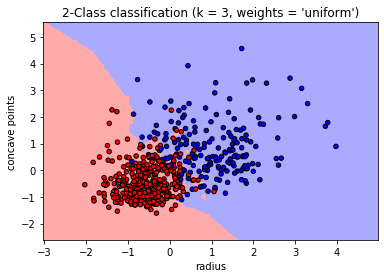

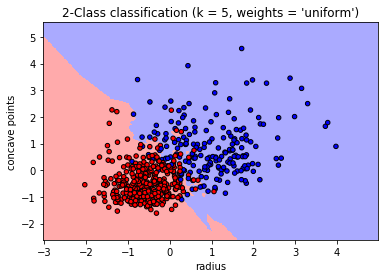

In [78]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

h = .02  # step size in the mesh
weights ='uniform'
# Create color maps
cmap_light = ListedColormap(['#FFAAAB', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we only take the first two features: radius_mean and concave points_mean. We could avoid this ugly
# slicing by using a two-dim dataset

for n_neighbors in [3,5]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_scaled[:,[0,5]], Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_scaled[:,0].min() - 1, X_scaled[:,0].max() + 1
    y_min, y_max = X_scaled[:,5].min() - 1, X_scaled[:,5].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_scaled[:, 0], X_scaled[:, 5], c=Y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel("radius")
    plt.ylabel("concave points")

plt.show()

#### Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_scaled_train,y_train)
y_pred = gnb.predict(X_scaled_holdout)

In [77]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_holdout, y_pred))
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, y_pred) )
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, y_pred))

Accuracy: 0.9298245614035088
Recall Score (how much of malignant tumours were predicted correctly) :  0.8852459016393442
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9152542372881356
